In [1]:
import pandas as pd

hourly_demand_airpot=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/Hourly Demand Patter/demand_airport.csv")
hourly_demand_dakshinDari=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/Hourly Demand Patter/demand_dakshindari.csv")
hourly_demand_howrah=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/Hourly Demand Patter/demand_howrah.csv")
hourly_demand_sectorV=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/Hourly Demand Patter/demand_sectorV.csv")
hourly_demand_victoria=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/Hourly Demand Patter/demand_victoria.csv")
hourly_demand=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/demand.csv")

In [2]:
hourly_demand_dakshinDari

,Unnamed: 0,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
0,25,0,0.0,0.0,29.60,2.0,21.0,65.0,4.0
1,26,3,0.0,0.0,29.55,0.0,17.0,42.0,3.0
2,27,0,0.0,0.0,28.98,3.0,16.0,49.0,0.0
3,28,1,0.0,0.0,28.98,0.0,21.0,32.0,1.0
4,29,0,0.0,0.0,29.15,1.0,18.0,21.0,6.0
...,...,...,...,...,...,...,...,...,...
1545,1573,46,0.0,0.0,37.00,90.0,6.0,0.0,27.0
1546,1574,48,0.0,0.0,37.76,46.0,13.0,2.0,23.0
1547,1575,37,0.0,0.0,37.65,48.0,8.0,0.0,20.0
1548,1576,30,0.0,0.0,38.03,37.0,13.0,3.0,23.0


In [52]:
hourly_demand_airpot=hourly_demand_airpot[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]

hourly_demand_dakshinDari=hourly_demand_dakshinDari[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]

hourly_demand_howrah=hourly_demand_howrah[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]

hourly_demand_sectorV=hourly_demand_sectorV[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]

hourly_demand_victoria=hourly_demand_victoria[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]

hourly_demand=hourly_demand[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]


In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data=hourly_demand_howrah

train_data = data.iloc[:1450]  
test_data = data.iloc[1450:]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
# Reshape y_pred_scaled to 2D array
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse transform and reshape to original shape
y_pred = scaler_y.inverse_transform(y_pred_scaled).reshape(-1)

# Now you can proceed with calculating the metrics
print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))



Epoch 1/100
46/46 [==============================] - 5s 72ms/step - loss: 0.0048 - val_loss: 0.0016
Epoch 2/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0034 - val_loss: 0.0015
Epoch 3/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 4/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 5/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 6/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 7/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 8/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0025 - val_loss: 0.0013
Epoch 9/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 10/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0025 - val_loss: 0.0012

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute MSE
mse = mean_squared_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

# Compute MAE
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute R2
r2 = r2_score(scaler_y.inverse_transform(y_test), y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 468.77874371744053
Root Mean Squared Error (RMSE): 21.65129889215519
Mean Absolute Error (MAE): 16.641050381660463
R-squared (R2): 0.3519018234429724


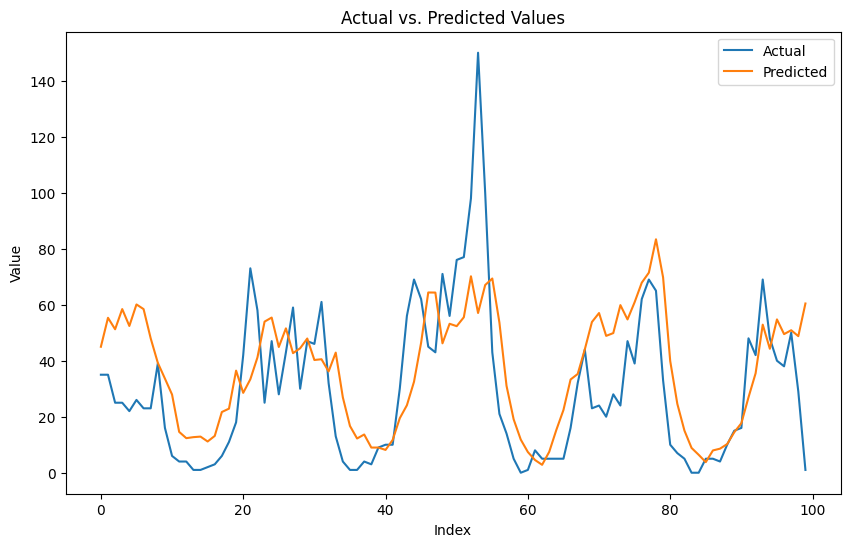

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(scaler_y.inverse_transform(y_test), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [21]:
hourly_demand.head()

,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
0,12,0.0,0.0,29.60,46.0,247.0,260.0,64.0
1,19,0.0,0.0,29.55,12.0,295.0,215.0,17.0
2,5,0.0,0.0,28.98,19.0,432.0,259.0,9.0
3,10,0.0,0.0,28.98,5.0,457.0,246.0,21.0
4,9,0.0,0.0,29.15,10.0,270.0,247.0,23.0


In [35]:
hourly_demand.index = pd.date_range(start='2024-04-01 00:00:00', periods=len(hourly_demand), freq='H')


In [36]:
hourly_demand

,index,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
2024-04-01 00:00:00,2024-04-01 00:00:00,12,0.0,0.0,29.60,46.0,247.0,260.0,64.0
2024-04-01 01:00:00,2024-04-01 01:00:00,19,0.0,0.0,29.55,12.0,295.0,215.0,17.0
2024-04-01 02:00:00,2024-04-01 02:00:00,5,0.0,0.0,28.98,19.0,432.0,259.0,9.0
2024-04-01 03:00:00,2024-04-01 03:00:00,10,0.0,0.0,28.98,5.0,457.0,246.0,21.0
2024-04-01 04:00:00,2024-04-01 04:00:00,9,0.0,0.0,29.15,10.0,270.0,247.0,23.0
...,...,...,...,...,...,...,...,...,...
2024-06-04 14:00:00,2024-06-04 14:00:00,14,0.0,0.0,36.01,234.0,550.0,72.0,331.0
2024-06-04 15:00:00,2024-06-04 15:00:00,5,0.0,0.0,34.70,14.0,587.0,53.0,384.0
2024-06-04 16:00:00,2024-06-04 16:00:00,2,0.0,0.0,33.52,5.0,607.0,82.0,356.0
2024-06-04 17:00:00,2024-06-04 17:00:00,6,0.0,0.0,32.62,2.0,407.0,285.0,360.0


In [37]:
hourly_demand_prophet = hourly_demand[['y']]
hourly_demand_prophet.reset_index(inplace=True)


In [38]:
hourly_demand_prophet

,index,y
0,2024-04-01 00:00:00,12
1,2024-04-01 01:00:00,19
2,2024-04-01 02:00:00,5
3,2024-04-01 03:00:00,10
4,2024-04-01 04:00:00,9
...,...,...
1550,2024-06-04 14:00:00,14
1551,2024-06-04 15:00:00,5
1552,2024-06-04 16:00:00,2
1553,2024-06-04 17:00:00,6


In [39]:
hourly_demand_prophet['ds']=hourly_demand_prophet['index']

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_32929/4215139068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_demand_prophet['ds']=hourly_demand_prophet['index']


In [40]:
hourly_demand_prophet=hourly_demand_prophet[['ds','y']]

In [41]:
hourly_demand_prophet

,ds,y
0,2024-04-01 00:00:00,12
1,2024-04-01 01:00:00,19
2,2024-04-01 02:00:00,5
3,2024-04-01 03:00:00,10
4,2024-04-01 04:00:00,9
...,...,...
1550,2024-06-04 14:00:00,14
1551,2024-06-04 15:00:00,5
1552,2024-06-04 16:00:00,2
1553,2024-06-04 17:00:00,6


In [44]:
from prophet import Prophet
model = Prophet()
model.fit(hourly_demand_prophet)

01:21:05 - cmdstanpy - INFO - Chain [1] start processing
01:21:05 - cmdstanpy - INFO - Chain [1] done processing


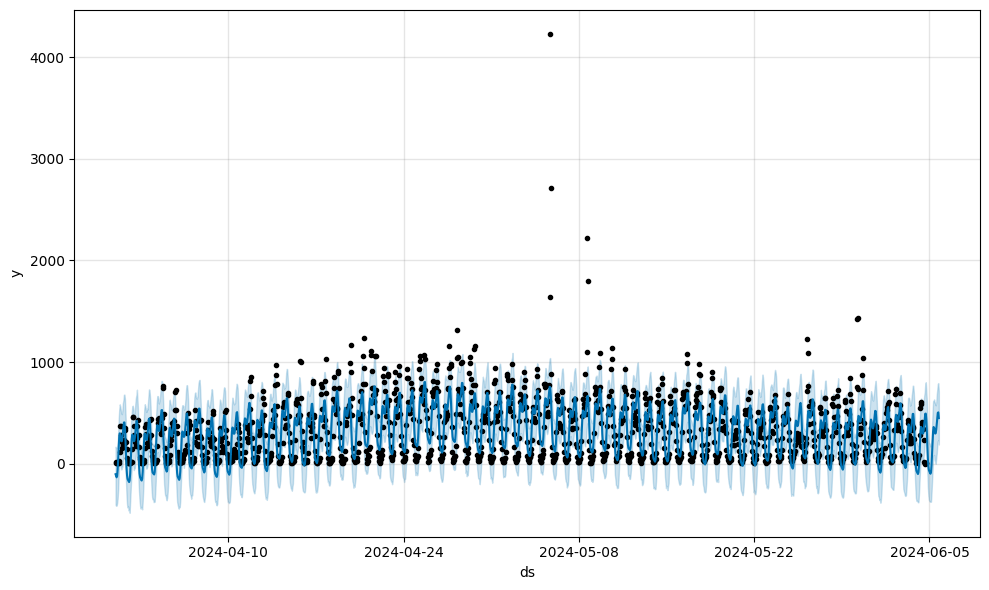

In [43]:
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)
fig1 = model.plot(forecast)

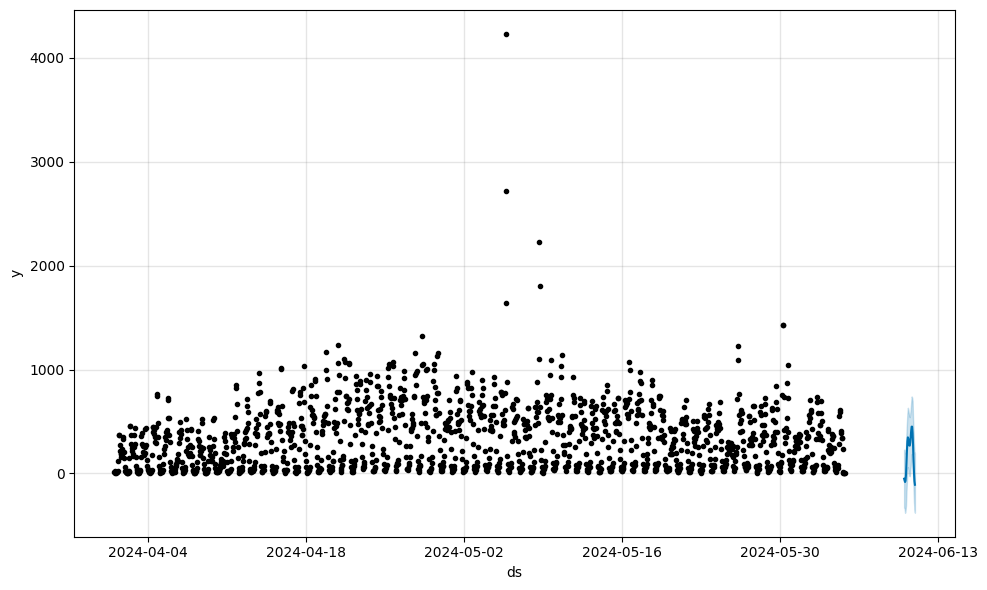

                    ds        yhat  yhat_lower  yhat_upper
0  2024-06-10 00:00:00  -50.652290 -330.305904  229.345543
1  2024-06-10 01:00:00  -67.603497 -333.354539  225.756359
2  2024-06-10 02:00:00  -82.084207 -378.189495  194.136638
3  2024-06-10 03:00:00  -70.697959 -353.611134  211.221680
4  2024-06-10 04:00:00  -10.540152 -308.921615  250.338292
5  2024-06-10 05:00:00   96.306086 -173.614764  390.486029
6  2024-06-10 06:00:00  217.702047  -74.184976  490.611186
7  2024-06-10 07:00:00  310.470853   28.316669  580.970950
8  2024-06-10 08:00:00  347.888021   61.021246  632.072415
9  2024-06-10 09:00:00  334.213955   36.392197  613.169950
10 2024-06-10 10:00:00  297.356167   19.324608  578.842171
11 2024-06-10 11:00:00  268.871873  -19.465187  566.918879
12 2024-06-10 12:00:00  267.881685  -25.809271  542.458061
13 2024-06-10 13:00:00  297.519476   23.998320  575.203693
14 2024-06-10 14:00:00  349.541813   68.895056  616.283592
15 2024-06-10 15:00:00  408.117729  137.307545  681.6678

In [46]:
# Create a DataFrame for the desired future date (10 June 2024)
future_date = pd.DataFrame({'ds': pd.date_range(start='2024-06-10 00:00:00', end='2024-06-10 23:00:00', freq='H')})

# Make predictions
forecast = model.predict(future_date)

# Plot the forecast
fig1 = model.plot(forecast)
plt.show()

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


In [49]:
hourly_demand_dakshinDari


[['y',
  'rain_intensity',
  'rain_accumulation',
  'temperature',
  'lag_1',
  'lag_8',
  'lag_12',
  'lag_24']]

In [65]:
hourly_demand_dakshinDari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   y                  1550 non-null   int64  
 1   rain_intensity     1550 non-null   float64
 2   rain_accumulation  1550 non-null   float64
 3   temperature        1550 non-null   float64
 4   lag_1              1550 non-null   float64
 5   lag_8              1550 non-null   float64
 6   lag_12             1550 non-null   float64
 7   lag_24             1550 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 97.0 KB


In [66]:
hourly_demand_reduced_dakshindari=hourly_demand_dakshinDari[['y','rain_intensity','rain_accumulation','lag_1','lag_12','lag_24']]

In [67]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data=hourly_demand_reduced_dakshindari

train_data = data.iloc[:1450]  
test_data = data.iloc[1450:]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
# Reshape y_pred_scaled to 2D array
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse transform and reshape to original shape
y_pred = scaler_y.inverse_transform(y_pred_scaled).reshape(-1)

# Now you can proceed with calculating the metrics
print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))



Epoch 1/100
46/46 [==============================] - 6s 45ms/step - loss: 0.0175 - val_loss: 0.0058
Epoch 2/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0106 - val_loss: 0.0043
Epoch 3/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0089 - val_loss: 0.0040
Epoch 4/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0089 - val_loss: 0.0045
Epoch 5/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0086 - val_loss: 0.0041
Epoch 6/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0088 - val_loss: 0.0042
Epoch 7/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0087 - val_loss: 0.0043
Epoch 8/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0086 - val_loss: 0.0043
Epoch 9/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0084 - val_loss: 0.0053
Epoch 10/100
46/46 [==============================] - 1s 22ms/step - loss: 0.0084 - val_loss: 0.0042

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute MSE
mse = mean_squared_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

# Compute MAE
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute R2
r2 = r2_score(scaler_y.inverse_transform(y_test), y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 465.31530097856256
Root Mean Squared Error (RMSE): 21.571168280335737
Mean Absolute Error (MAE): 15.19610589441627
R-squared (R2): 0.25105992254490195


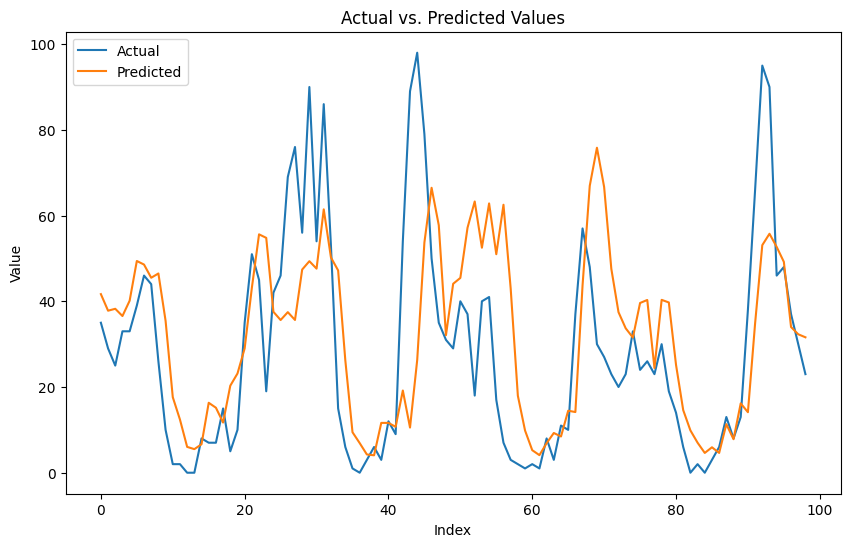

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(scaler_y.inverse_transform(y_test), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [64]:
import joblib
joblib.dump(scaler_X, 'scaler_x_dakshindari.pkl')
joblib.dump(scaler_y, 'scaler_y_dakshindari.pkl')
model.save('lstm_dakshindar.h5')

/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data=hourly_demand_sectorV

train_data = data.iloc[:1250]  
test_data = data.iloc[1250:1450]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
# Reshape y_pred_scaled to 2D array
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse transform and reshape to original shape
y_pred = scaler_y.inverse_transform(y_pred_scaled).reshape(-1)

# Now you can proceed with calculating the metrics
print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))



Epoch 1/100
40/40 [==============================] - 4s 40ms/step - loss: 0.0034 - val_loss: 0.0016
Epoch 2/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 3/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 4/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 5/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 6/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 7/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 8/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 9/100
40/40 [==============================] - 1s 14ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 10/100
40/40 [==============================] - 1s 18ms/step - loss: 0.0024 - val_loss: 0.0019

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute MSE
mse = mean_squared_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

# Compute MAE
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute R2
r2 = r2_score(scaler_y.inverse_transform(y_test), y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 1992.6627317506532
Root Mean Squared Error (RMSE): 44.63925102138983
Mean Absolute Error (MAE): 28.89155524250251
R-squared (R2): -0.17348743020297341


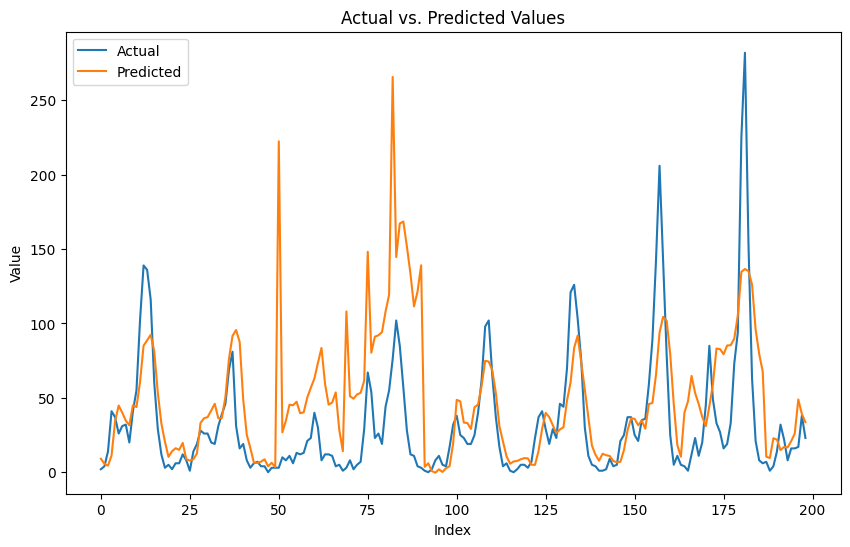

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(scaler_y.inverse_transform(y_test), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [81]:
import joblib
joblib.dump(scaler_X, 'scaler_x_sectorV.pkl')
joblib.dump(scaler_y, 'scaler_y_sectorV.pkl')
model.save('lstm_sectorV.h5')

/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data=hourly_demand_howrah

train_data = data.iloc[:1250]  
test_data = data.iloc[1250:1450]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
# Reshape y_pred_scaled to 2D array
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse transform and reshape to original shape
y_pred = scaler_y.inverse_transform(y_pred_scaled).reshape(-1)

# Now you can proceed with calculating the metrics
print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))



Epoch 1/100
40/40 [==============================] - 7s 58ms/step - loss: 0.0054 - val_loss: 0.0020
Epoch 2/100
40/40 [==============================] - 1s 17ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 3/100
40/40 [==============================] - 1s 27ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 4/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 5/100
40/40 [==============================] - 1s 19ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 6/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 7/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 8/100
40/40 [==============================] - 1s 18ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 9/100
40/40 [==============================] - 1s 17ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 10/100
40/40 [==============================] - 1s 28ms/step - loss: 0.0028 - val_loss: 0.0015

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute MSE
mse = mean_squared_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

# Compute MAE
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute R2
r2 = r2_score(scaler_y.inverse_transform(y_test), y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 609.4895663449097
Root Mean Squared Error (RMSE): 24.687842480559326
Mean Absolute Error (MAE): 19.99664913589631
R-squared (R2): 0.4091510387734404


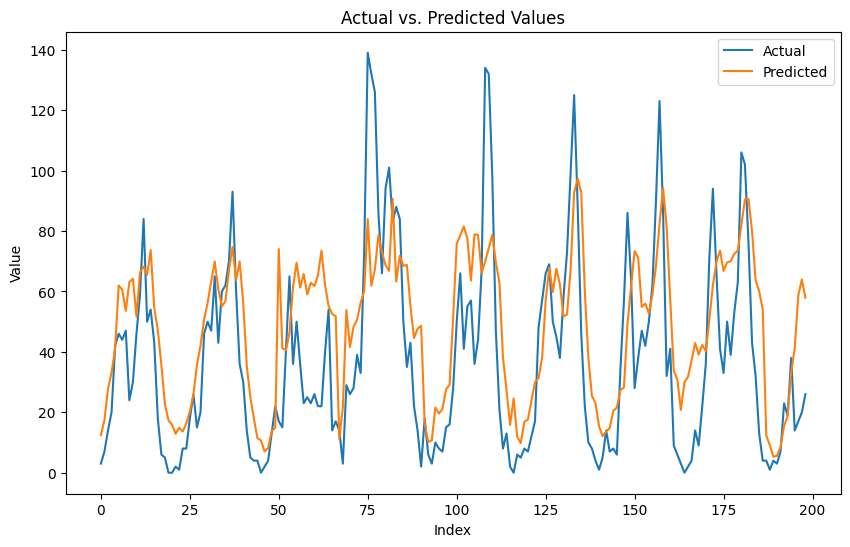

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(scaler_y.inverse_transform(y_test), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [86]:
import joblib
joblib.dump(scaler_X, 'scaler_x_howrah.pkl')
joblib.dump(scaler_y, 'scaler_y_howrah.pkl')
model.save('lstm_howrah.h5')

In [87]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data=hourly_demand_howrah

train_data = data.iloc[:1250]  
test_data = data.iloc[1250:1450]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
# Reshape y_pred_scaled to 2D array
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse transform and reshape to original shape
y_pred = scaler_y.inverse_transform(y_pred_scaled).reshape(-1)

# Now you can proceed with calculating the metrics
print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))



Epoch 1/100
40/40 [==============================] - 6s 56ms/step - loss: 0.0052 - val_loss: 0.0020
Epoch 2/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0037 - val_loss: 0.0016
Epoch 3/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 4/100
40/40 [==============================] - 1s 20ms/step - loss: 0.0030 - val_loss: 0.0019
Epoch 5/100
40/40 [==============================] - 1s 16ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 6/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 7/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 8/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 9/100
40/40 [==============================] - 1s 13ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 10/100
40/40 [==============================] - 1s 15ms/step - loss: 0.0029 - val_loss: 0.0014

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute MSE
mse = mean_squared_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

# Compute MAE
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute R2
r2 = r2_score(scaler_y.inverse_transform(y_test), y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 500.16675989193004
Root Mean Squared Error (RMSE): 22.36440832867997
Mean Absolute Error (MAE): 16.994015922498463
R-squared (R2): 0.515130320779003


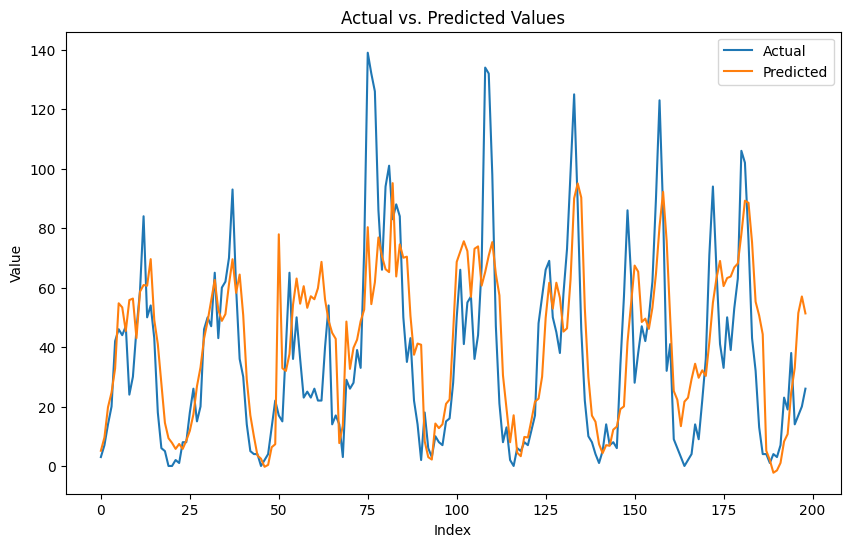

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(scaler_y.inverse_transform(y_test), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [90]:
import joblib
joblib.dump(scaler_X, 'scaler_x_victoria.pkl')
joblib.dump(scaler_y, 'scaler_y_victoria.pkl')
model.save('lstm_victoria.h5')

/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import pandas as pd
hourly_demand=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/demand.csv")

In [3]:
for lag in range(1, 25):
    hourly_demand[f'y_lag_{lag}'] = hourly_demand['y'].shift(lag)

In [4]:
hourly_demand

,Unnamed: 0,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24,y_lag_1,...,y_lag_15,y_lag_16,y_lag_17,y_lag_18,y_lag_19,y_lag_20,y_lag_21,y_lag_22,y_lag_23,y_lag_24
0,25,12,0.0,0.0,29.60,46.0,247.0,260.0,64.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26,19,0.0,0.0,29.55,12.0,295.0,215.0,17.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,5,0.0,0.0,28.98,19.0,432.0,259.0,9.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,10,0.0,0.0,28.98,5.0,457.0,246.0,21.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29,9,0.0,0.0,29.15,10.0,270.0,247.0,23.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,1578,14,0.0,0.0,36.01,234.0,550.0,72.0,331.0,234.0,...,10.0,34.0,61.0,74.0,104.0,242.0,360.0,356.0,384.0,331.0
1551,1579,5,0.0,0.0,34.70,14.0,587.0,53.0,384.0,14.0,...,26.0,10.0,34.0,61.0,74.0,104.0,242.0,360.0,356.0,384.0
1552,1580,2,0.0,0.0,33.52,5.0,607.0,82.0,356.0,5.0,...,50.0,26.0,10.0,34.0,61.0,74.0,104.0,242.0,360.0,356.0
1553,1581,6,0.0,0.0,32.62,2.0,407.0,285.0,360.0,2.0,...,72.0,50.0,26.0,10.0,34.0,61.0,74.0,104.0,242.0,360.0


In [5]:
hourly_demand.dropna()

,Unnamed: 0,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24,y_lag_1,...,y_lag_15,y_lag_16,y_lag_17,y_lag_18,y_lag_19,y_lag_20,y_lag_21,y_lag_22,y_lag_23,y_lag_24
24,49,11,0.0,0.0,29.25,27.0,190.0,215.0,12.0,27.0,...,373.0,118.0,27.0,12.0,17.0,9.0,10.0,5.0,19.0,12.0
25,50,10,0.0,0.0,28.96,11.0,232.0,154.0,19.0,11.0,...,372.0,373.0,118.0,27.0,12.0,17.0,9.0,10.0,5.0,19.0
26,51,6,0.0,0.0,28.53,10.0,353.0,187.0,5.0,10.0,...,278.0,372.0,373.0,118.0,27.0,12.0,17.0,9.0,10.0,5.0
27,52,3,0.0,0.0,28.48,6.0,332.0,188.0,10.0,6.0,...,215.0,278.0,372.0,373.0,118.0,27.0,12.0,17.0,9.0,10.0
28,53,7,0.0,0.0,28.49,3.0,211.0,190.0,9.0,3.0,...,154.0,215.0,278.0,372.0,373.0,118.0,27.0,12.0,17.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,1578,14,0.0,0.0,36.01,234.0,550.0,72.0,331.0,234.0,...,10.0,34.0,61.0,74.0,104.0,242.0,360.0,356.0,384.0,331.0
1551,1579,5,0.0,0.0,34.70,14.0,587.0,53.0,384.0,14.0,...,26.0,10.0,34.0,61.0,74.0,104.0,242.0,360.0,356.0,384.0
1552,1580,2,0.0,0.0,33.52,5.0,607.0,82.0,356.0,5.0,...,50.0,26.0,10.0,34.0,61.0,74.0,104.0,242.0,360.0,356.0
1553,1581,6,0.0,0.0,32.62,2.0,407.0,285.0,360.0,2.0,...,72.0,50.0,26.0,10.0,34.0,61.0,74.0,104.0,242.0,360.0


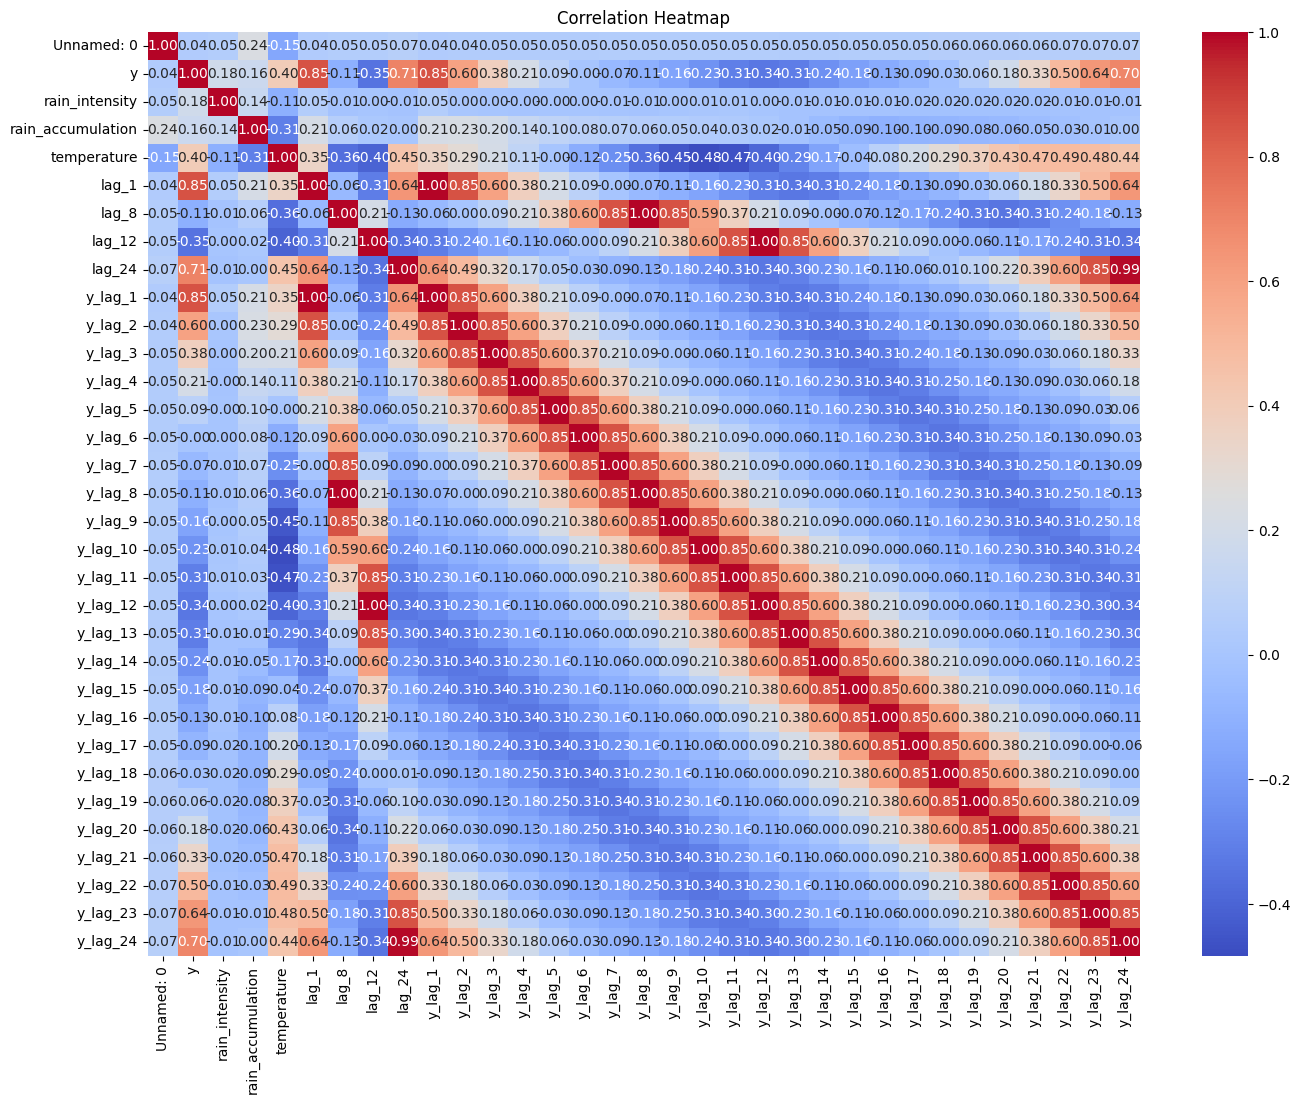

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
hourly_demand.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = hourly_demand.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [6]:
hourly_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1555 non-null   int64  
 1   y                  1555 non-null   int64  
 2   rain_intensity     1555 non-null   float64
 3   rain_accumulation  1555 non-null   float64
 4   temperature        1555 non-null   float64
 5   lag_1              1555 non-null   float64
 6   lag_8              1555 non-null   float64
 7   lag_12             1555 non-null   float64
 8   lag_24             1555 non-null   float64
 9   y_lag_1            1554 non-null   float64
 10  y_lag_2            1553 non-null   float64
 11  y_lag_3            1552 non-null   float64
 12  y_lag_4            1551 non-null   float64
 13  y_lag_5            1550 non-null   float64
 14  y_lag_6            1549 non-null   float64
 15  y_lag_7            1548 non-null   float64
 16  y_lag_8            1547 

In [7]:
hourly_demand=hourly_demand[['y','rain_intensity','rain_accumulation','temperature','y_lag_1','y_lag_2','y_lag_3','y_lag_22','y_lag_23','y_lag_24']]

In [8]:
hourly_demand

,y,rain_intensity,rain_accumulation,temperature,y_lag_1,y_lag_2,y_lag_3,y_lag_22,y_lag_23,y_lag_24
0,12,0.0,0.0,29.60,NaN,NaN,NaN,NaN,NaN,NaN
1,19,0.0,0.0,29.55,12.0,NaN,NaN,NaN,NaN,NaN
2,5,0.0,0.0,28.98,19.0,12.0,NaN,NaN,NaN,NaN
3,10,0.0,0.0,28.98,5.0,19.0,12.0,NaN,NaN,NaN
4,9,0.0,0.0,29.15,10.0,5.0,19.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1550,14,0.0,0.0,36.01,234.0,338.0,343.0,356.0,384.0,331.0
1551,5,0.0,0.0,34.70,14.0,234.0,338.0,360.0,356.0,384.0
1552,2,0.0,0.0,33.52,5.0,14.0,234.0,242.0,360.0,356.0
1553,6,0.0,0.0,32.62,2.0,5.0,14.0,104.0,242.0,360.0


In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data=hourly_demand

train_data = data.iloc[400:650]  
test_data = data.iloc[650:750]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM lstm_model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM lstm_model
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
lstm_model.add(LSTM(32))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1))

# Compile the lstm_model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the lstm_model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = lstm_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
# Reshape y_pred_scaled to 2D array
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse transform and reshape to original shape
y_pred = scaler_y.inverse_transform(y_pred_scaled).reshape(-1)

# Now you can proceed with calculating the metrics
print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))



Epoch 1/100
8/8 [==============================] - 3s 139ms/step - loss: 0.1603 - val_loss: 0.1010
Epoch 2/100
8/8 [==============================] - 0s 17ms/step - loss: 0.1107 - val_loss: 0.0598
Epoch 3/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0668 - val_loss: 0.0295
Epoch 4/100
8/8 [==============================] - 0s 18ms/step - loss: 0.0376 - val_loss: 0.0250
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 0.0418 - val_loss: 0.0240
Epoch 6/100
8/8 [==============================] - 0s 26ms/step - loss: 0.0379 - val_loss: 0.0213
Epoch 7/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0365 - val_loss: 0.0210
Epoch 8/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0322 - val_loss: 0.0190
Epoch 9/100
8/8 [==============================] - 0s 23ms/step - loss: 0.0352 - val_loss: 0.0185
Epoch 10/100
8/8 [==============================] - 0s 34ms/step - loss: 0.0309 - val_loss: 0.0175
Epoch 11/100
8/8 [

In [18]:
import joblib
joblib.dump(scaler_X, 'scaler_x_Kolkata_city_123_222324.pkl')
joblib.dump(scaler_y, 'scaler_y_Kolkata_city_123_222324.pkl')
model.save('lstm_Kolkata_city_123_222324.h5')

/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute MSE
mse = mean_squared_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

# Compute MAE
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute R2
r2 = r2_score(scaler_y.inverse_transform(y_test), y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 20119.004127174027
Root Mean Squared Error (RMSE): 141.8414753419254
Mean Absolute Error (MAE): 96.49887188034829
R-squared (R2): 0.7962817527152354


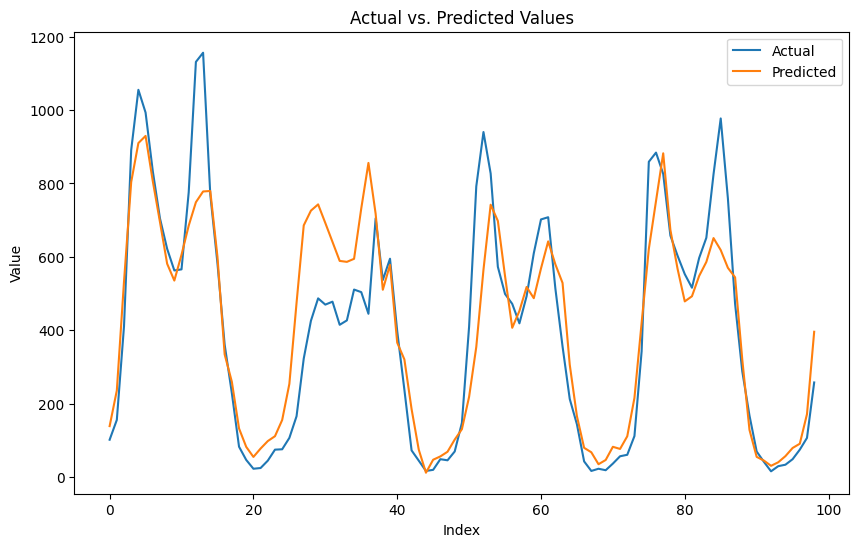

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(scaler_y.inverse_transform(y_test), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [62]:
import numpy as np

y	rain_intensity	rain_accumulation	temperature	y_lag_1	y_lag_2	y_lag_3	y_lag_22	y_lag_23	y_lag_24

In [64]:
new_sample = np.array([[0,0,35,1180,1110,484,1319,1385,1172]]) 

new_sample_scaled = scaler_X.transform(new_sample)

new_sample_reshaped = new_sample_scaled.reshape((new_sample_scaled.shape[0], 1, new_sample_scaled.shape[1]))

y_pred_scaled = lstm_model.predict(new_sample_reshaped)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted value of y:", y_pred)
print("Predicted value(adjusted) of y:", y_pred*0.96)

1/1 [==============================] - 0s 90ms/step
Predicted value of y: [[1012.76294]]
Predicted value(adjusted) of y: [[972.2524]]


In [78]:
new_sample = np.array([[0,0,35,487,122,92,205,656,1420]]) 

new_sample_scaled = scaler_X.transform(new_sample)

new_sample_reshaped = new_sample_scaled.reshape((new_sample_scaled.shape[0], 1, new_sample_scaled.shape[1]))

y_pred_scaled = lstm_model.predict(new_sample_reshaped)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted value of y:", y_pred)
print("Predicted value(adjusted) of y:", y_pred*0.96)

1/1 [==============================] - 0s 41ms/step
Predicted value of y: [[542.2668]]
Predicted value(adjusted) of y: [[520.5761]]


In [74]:
new_sample = np.array([[0,0,37,800,643,477,608,817,900]]) 

new_sample_scaled = scaler_X.transform(new_sample)

new_sample_reshaped = new_sample_scaled.reshape((new_sample_scaled.shape[0], 1, new_sample_scaled.shape[1]))

y_pred_scaled = lstm_model.predict(new_sample_reshaped)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted value of y:", y_pred)
print("Predicted value(adjusted) of y:", y_pred*0.96)

1/1 [==============================] - 0s 65ms/step
Predicted value of y: [[721.13367]]
Predicted value(adjusted) of y: [[692.2883]]


<Axes: title={'center': 'Hourly Rain/ Baguhati'}>

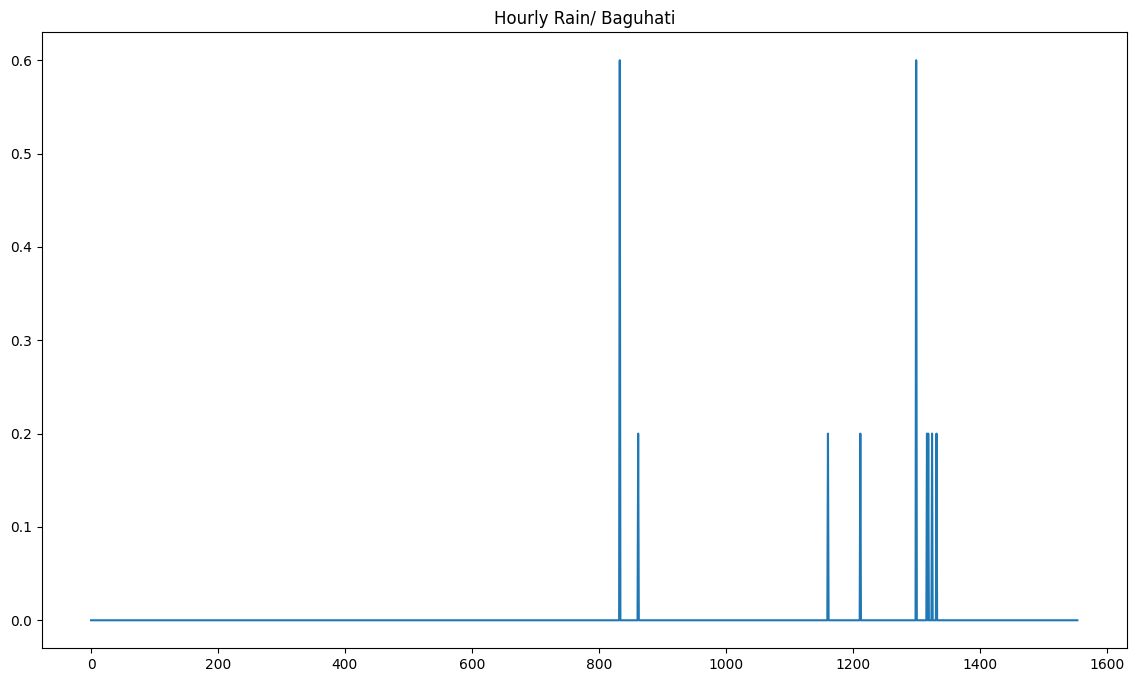

In [9]:
hourly_demand['rain_intensity'].plot(figsize=(14, 8), title='Hourly Rain/ Baguhati')


<Axes: title={'center': 'Hourly Requests/ Baguhati'}>

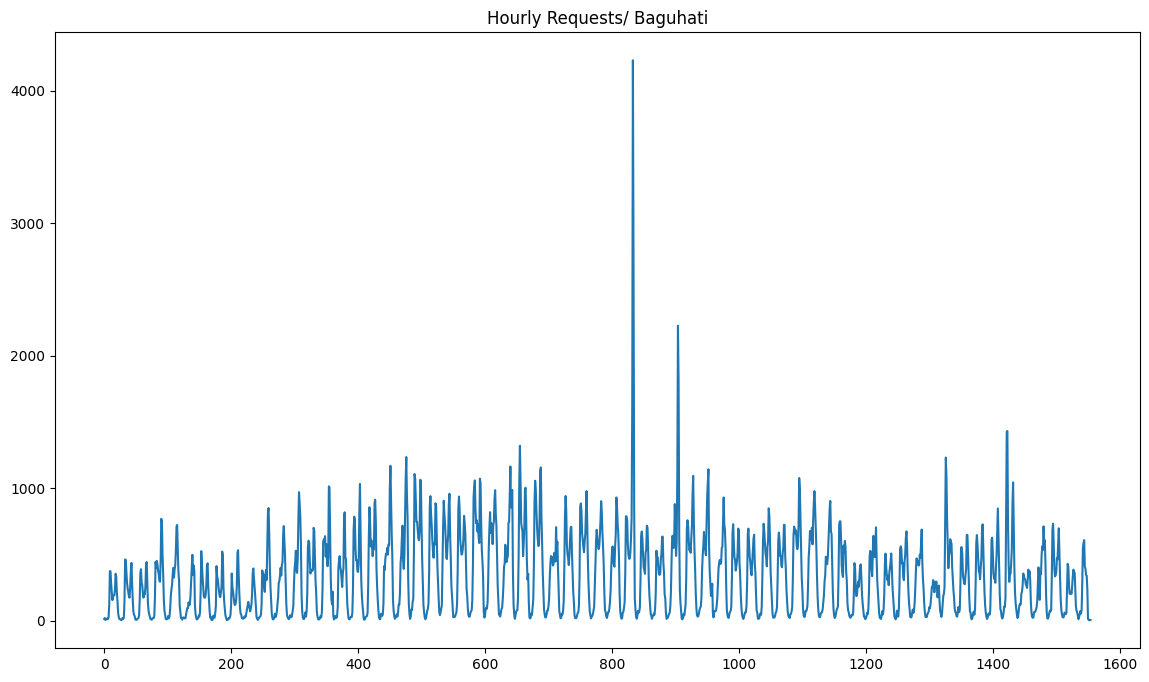

In [10]:
hourly_demand['y'].plot(figsize=(14, 8), title='Hourly Requests/ Baguhati')

In [ ]:
hourly_demand['']

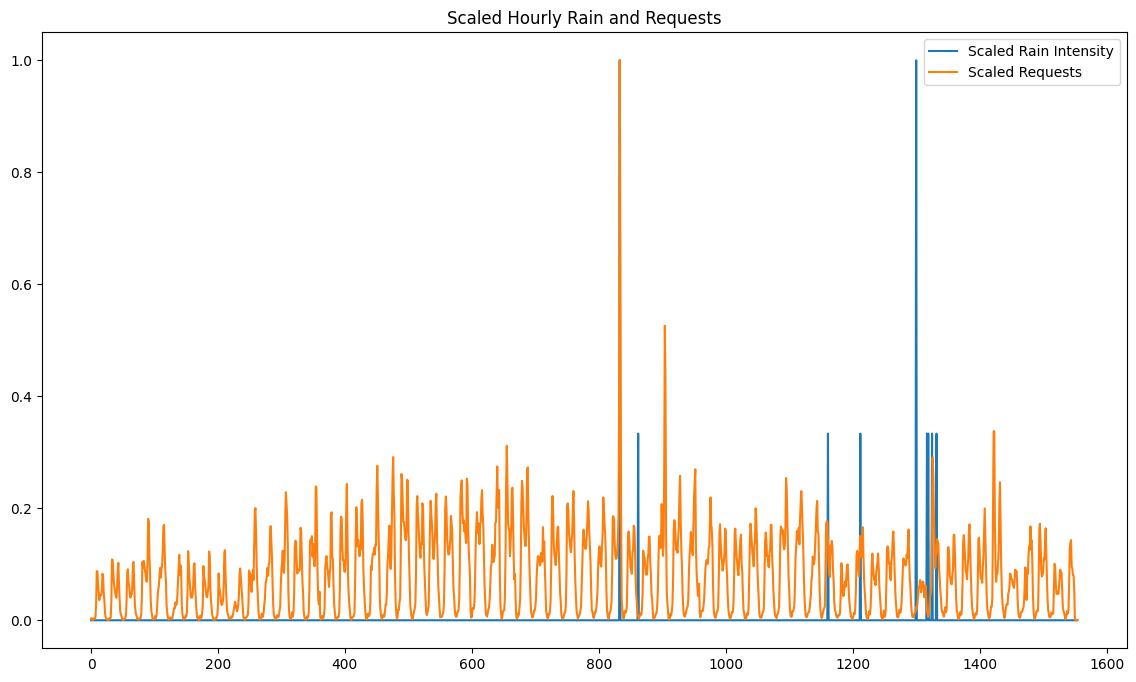

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming hourly_demand is your DataFrame containing 'rain_intensity' and 'y' columns

# Perform Min-Max scaling
hourly_demand_scaled = hourly_demand.copy()  # Create a copy to avoid modifying the original DataFrame
hourly_demand_scaled['rain_intensity'] = (hourly_demand['rain_intensity'] - hourly_demand['rain_intensity'].min()) / (hourly_demand['rain_intensity'].max() - hourly_demand['rain_intensity'].min())
hourly_demand_scaled['y'] = (hourly_demand['y'] - hourly_demand['y'].min()) / (hourly_demand['y'].max() - hourly_demand['y'].min())

# Plotting
plt.figure(figsize=(14, 8))

# Plot scaled rain_intensity
hourly_demand_scaled['rain_intensity'].plot(label='Scaled Rain Intensity')

# Plot scaled y
hourly_demand_scaled['y'].plot(label='Scaled Requests')

plt.title('Scaled Hourly Rain and Requests')
plt.legend()
plt.show()


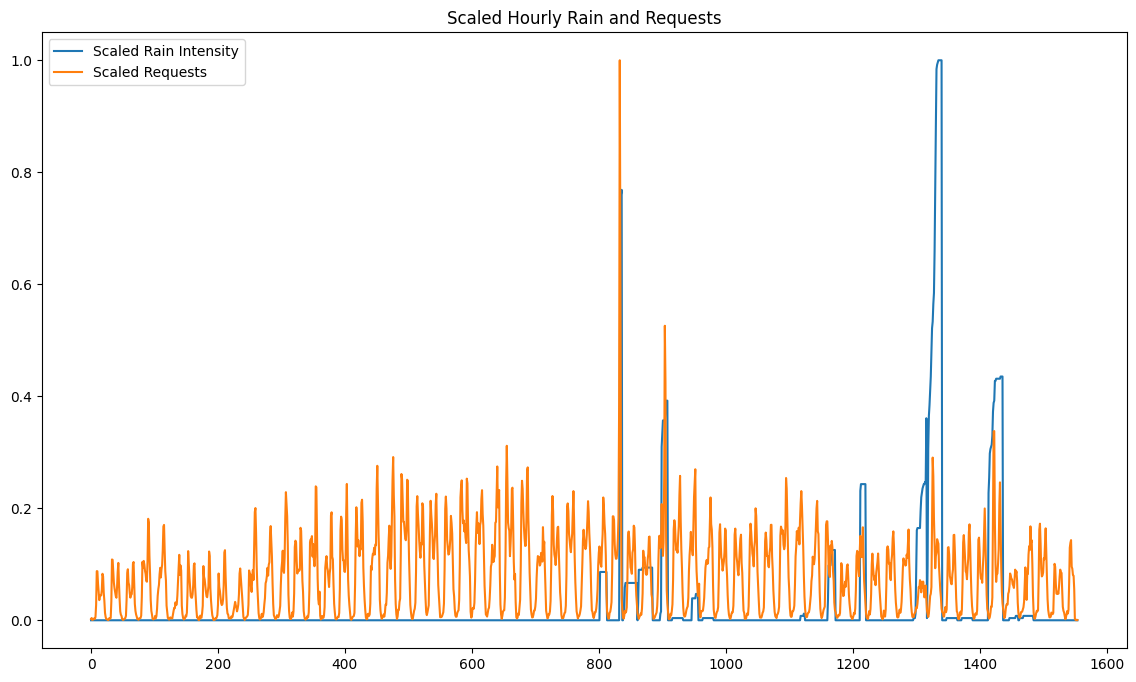

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# Perform Min-Max scaling
hourly_demand_scaled = hourly_demand.copy()  # Create a copy to avoid modifying the original DataFrame
hourly_demand_scaled['rain_accumulation'] = (hourly_demand['rain_accumulation'] - hourly_demand['rain_accumulation'].min()) / (hourly_demand['rain_accumulation'].max() - hourly_demand['rain_accumulation'].min())
hourly_demand_scaled['y'] = (hourly_demand['y'] - hourly_demand['y'].min()) / (hourly_demand['y'].max() - hourly_demand['y'].min())

# Plotting
plt.figure(figsize=(14, 8))

# Plot scaled rain_intensity
hourly_demand_scaled['rain_accumulation'].plot(label='Scaled Rain Intensity')

# Plot scaled y
hourly_demand_scaled['y'].plot(label='Scaled Requests')

plt.title('Scaled Hourly Rain and Requests')
plt.legend()
plt.show()


<Axes: title={'center': 'Hourly Requests/ Baguhati'}>

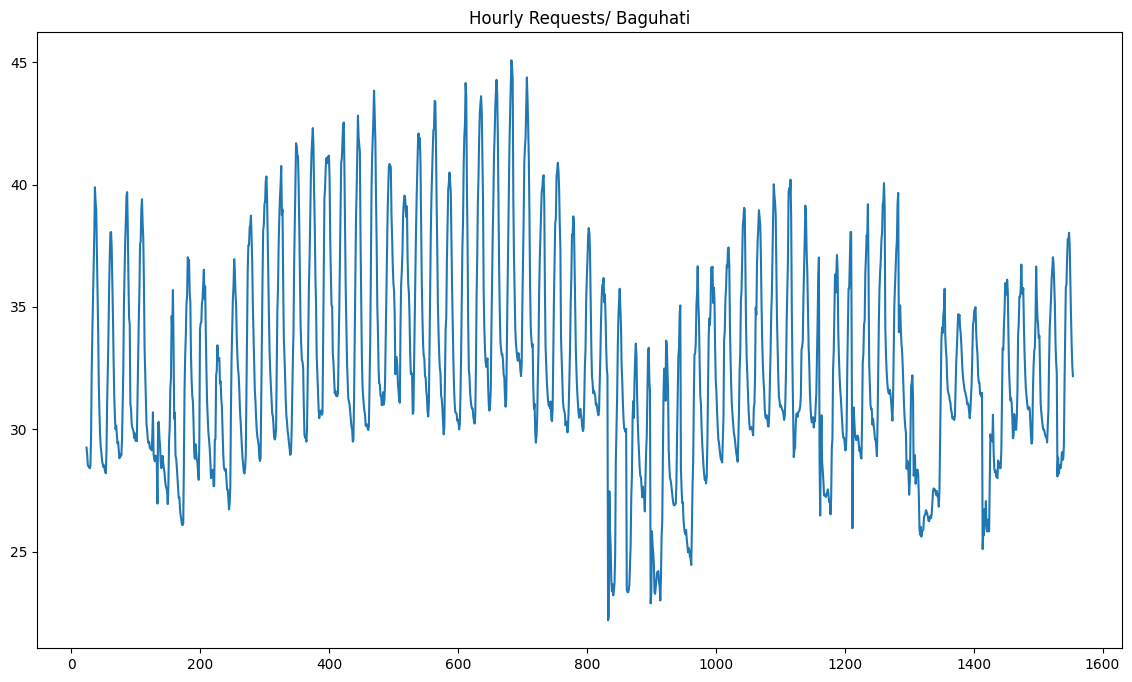

In [44]:
hourly_demand['temperature'].plot(figsize=(14, 8), title='Hourly Requests/ Baguhati')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute MSE
mse = mean_squared_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

# Compute MAE
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute R2
r2 = r2_score(scaler_y.inverse_transform(y_test), y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 43838.09717131674
Root Mean Squared Error (RMSE): 209.37549324435452
Mean Absolute Error (MAE): 148.2050370284489
R-squared (R2): 0.28153443400781963


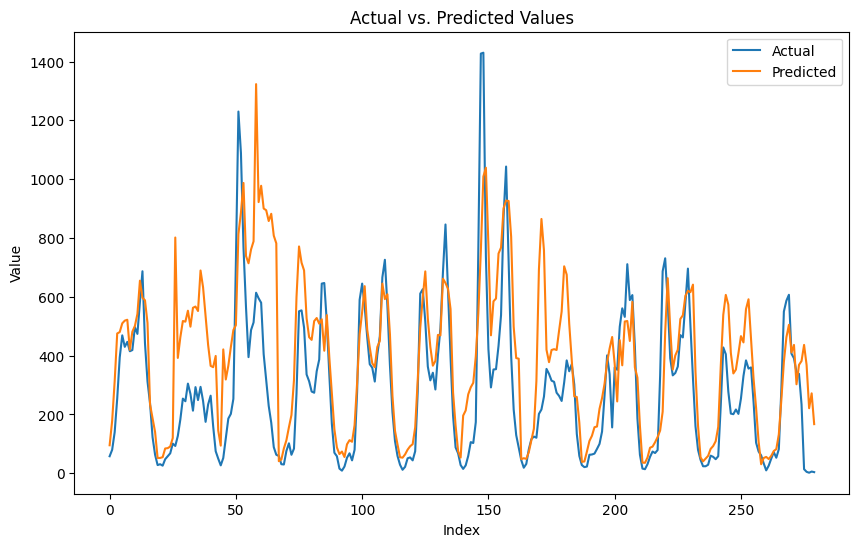

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(scaler_y.inverse_transform(y_test), label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
hourly_demand

,y,rain_intensity,rain_accumulation,temperature,y_lag_1,y_lag_2,y_lag_3,y_lag_22,y_lag_23,y_lag_24
24,11,0.0,0.0,29.25,27.0,58.0,148.0,5.0,19.0,12.0
25,10,0.0,0.0,28.96,11.0,27.0,58.0,10.0,5.0,19.0
26,6,0.0,0.0,28.53,10.0,11.0,27.0,9.0,10.0,5.0
27,3,0.0,0.0,28.48,6.0,10.0,11.0,17.0,9.0,10.0
28,7,0.0,0.0,28.49,3.0,6.0,10.0,12.0,17.0,9.0
...,...,...,...,...,...,...,...,...,...,...
1550,14,0.0,0.0,36.01,234.0,338.0,343.0,356.0,384.0,331.0
1551,5,0.0,0.0,34.70,14.0,234.0,338.0,360.0,356.0,384.0
1552,2,0.0,0.0,33.52,5.0,14.0,234.0,242.0,360.0,356.0
1553,6,0.0,0.0,32.62,2.0,5.0,14.0,104.0,242.0,360.0


In [ ]:
hourly_demand_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1555 non-null   datetime64[ns]
 1   y       1555 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.4 KB


In [ ]:
from neuralprophet import NeuralProphet
m = NeuralProphet()
m.set_plotting_backend("plotly-static")  
metrics = m.fit(hourly_demand_prophet, freq='H')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.936% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 100
WARNING - (py.warnings._showwarnmsg) - /Users/aayushjain/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/setup.py:201: UserWarning:

MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.


WARNING - (NP.config.set_lr_finder_args) - L

Epoch 100: 100%|██████████| 100/100 [00:00<00:00, 750.03it/s, loss=0.0495, v_num=9, MAE=140.0, RMSE=202.0, Loss=0.0503, RegLoss=0.000]   


In [ ]:
hourly_demand_prophet

,ds,y
0,2024-04-01 00:00:00,12
1,2024-04-01 01:00:00,19
2,2024-04-01 02:00:00,5
3,2024-04-01 03:00:00,10
4,2024-04-01 04:00:00,9
...,...,...
1550,2024-06-04 14:00:00,14
1551,2024-06-04 15:00:00,5
1552,2024-06-04 16:00:00,2
1553,2024-06-04 17:00:00,6


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.936% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.936% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 209.07it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.936% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.936% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H



Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 243.84it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


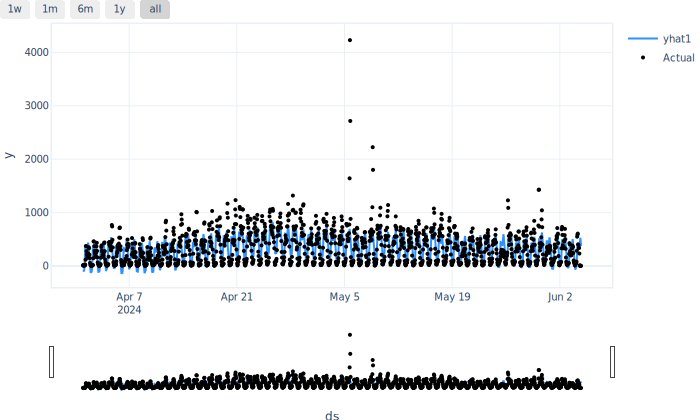

In [ ]:
predicted = m.predict(hourly_demand_prophet)
forecast = m.predict(hourly_demand_prophet)
m.plot(forecast)
python -m venv myenv


In [ ]:
future_date = pd.DataFrame({'ds': pd.date_range(start='2024-06-10 00:00:00', end='2024-06-10 23:00:00', freq='H')})

# Make predictions
forecast = m.predict(future_date)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


KeyError: 'y'

In [ ]:
# Generate future dates for prediction
future_date = pd.DataFrame({'ds': pd.date_range(start='2024-06-10 00:00:00', end='2024-06-10 23:00:00', freq='H')})

# Make predictions
forecast = m.predict(future_date)

# Display forecast
print(forecast)


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 95.833% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


KeyError: 'y'

In [ ]:
hourly_demand_prophet

,ds,y
0,2024-04-01 00:00:00,12
1,2024-04-01 01:00:00,19
2,2024-04-01 02:00:00,5
3,2024-04-01 03:00:00,10
4,2024-04-01 04:00:00,9
...,...,...
1550,2024-06-04 14:00:00,14
1551,2024-06-04 15:00:00,5
1552,2024-06-04 16:00:00,2
1553,2024-06-04 17:00:00,6


In [ ]:
future = m.make_future_dataframe(hourly_demand_prophet, periods=24*6, n_historic_predictions=True) 

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig_forecast = model.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.936% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.936% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.206% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.206% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 254.51it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



Predicted value for 2024-06-10 00:00:00: -66.46495819091797


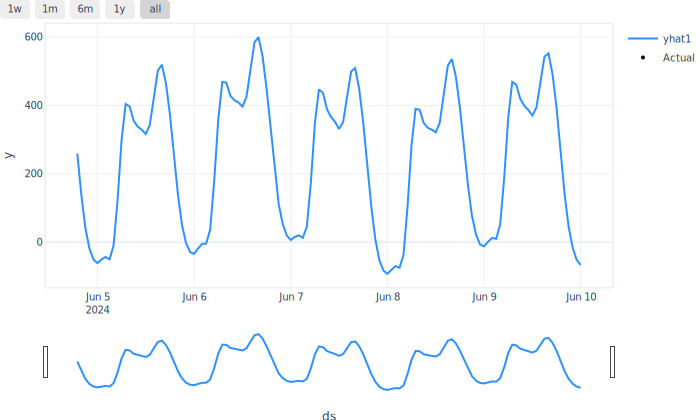

In [ ]:
future_date = '2024-06-10 00:00:00'
future_date = pd.to_datetime(future_date)

# Calculate the number of periods to predict from the last date in the training data to the future date
last_date = hourly_demand_prophet['ds'].max()
periods_to_predict = (future_date - last_date).days * 24 + (future_date - last_date).seconds // 3600

# Create future dataframe
future = m.make_future_dataframe(hourly_demand_prophet, periods=periods_to_predict)

# Make predictions
forecast = m.predict(future)

# Print the forecast for the custom date
predicted_value = forecast[forecast['ds'] == future_date]['yhat1'].values[0]
print(f"Predicted value for {future_date}: {predicted_value}")

# Plot the forecast
fig_forecast = m.plot(forecast)

In [ ]:
forecast.tail(24)

,ds,y,yhat1,trend,season_weekly,season_daily
102,2024-06-09 01:00:00,None,1.213928,230.768936,45.256756,-274.811768
103,2024-06-09 02:00:00,None,12.466679,230.593094,47.526848,-265.653259
104,2024-06-09 03:00:00,None,9.887790,230.417252,49.366386,-269.895844
105,2024-06-09 04:00:00,None,52.040493,230.241409,50.767223,-228.968140
106,2024-06-09 05:00:00,None,186.985825,230.065567,51.597832,-94.677574
107,2024-06-09 06:00:00,None,364.079834,229.889725,51.916637,82.273460
108,2024-06-09 07:00:00,None,468.696625,229.713882,51.759651,187.223099
109,2024-06-09 08:00:00,None,460.545532,229.538040,51.012543,179.994934
110,2024-06-09 09:00:00,None,418.856171,229.362198,49.936775,139.557205
111,2024-06-09 10:00:00,None,399.133789,229.186356,48.269253,121.678192


In [ ]:
forecast['yhat1'].tail(24).sum()

6295.8545

In [21]:
hourly_demand

,y,rain_intensity,rain_accumulation,temperature,y_lag_1,y_lag_2,y_lag_3,y_lag_22,y_lag_23,y_lag_24
24,11,0.0,0.0,29.25,27.0,58.0,148.0,5.0,19.0,12.0
25,10,0.0,0.0,28.96,11.0,27.0,58.0,10.0,5.0,19.0
26,6,0.0,0.0,28.53,10.0,11.0,27.0,9.0,10.0,5.0
27,3,0.0,0.0,28.48,6.0,10.0,11.0,17.0,9.0,10.0
28,7,0.0,0.0,28.49,3.0,6.0,10.0,12.0,17.0,9.0
...,...,...,...,...,...,...,...,...,...,...
1550,14,0.0,0.0,36.01,234.0,338.0,343.0,356.0,384.0,331.0
1551,5,0.0,0.0,34.70,14.0,234.0,338.0,360.0,356.0,384.0
1552,2,0.0,0.0,33.52,5.0,14.0,234.0,242.0,360.0,356.0
1553,6,0.0,0.0,32.62,2.0,5.0,14.0,104.0,242.0,360.0


In [87]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = hourly_demand

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)  # 80% for training
train_data = data[:train_size]
test_data = data[train_size:]

# Extract the relevant columns for training
X_train = train_data[['rain_intensity', 'rain_accumulation', 'temperature', 'y_lag_1', 'y_lag_2', 'y_lag_3', 'y_lag_22', 'y_lag_23', 'y_lag_24']]
y_train = train_data['y']

# Extract the relevant columns for testing
X_test = test_data[['rain_intensity', 'rain_accumulation', 'temperature', 'y_lag_1', 'y_lag_2', 'y_lag_3', 'y_lag_22', 'y_lag_23', 'y_lag_24']]
y_test = test_data['y']

# Train the ARIMA model
order = ( (0, 1, 1))  # ARIMA(p, d, q), you might need to adjust these parameters
model = ARIMA(y_train, X_train, order=order)
arima_model = model.fit()

# Make predictions
predictions = arima_model.predict(start=len(train_data), end=len(data)-1, exog=X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 72.61934662595502
MSE: 22917.09681997996
RMSE: 151.3839384478418
R2 Score: 0.6172160714877708


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


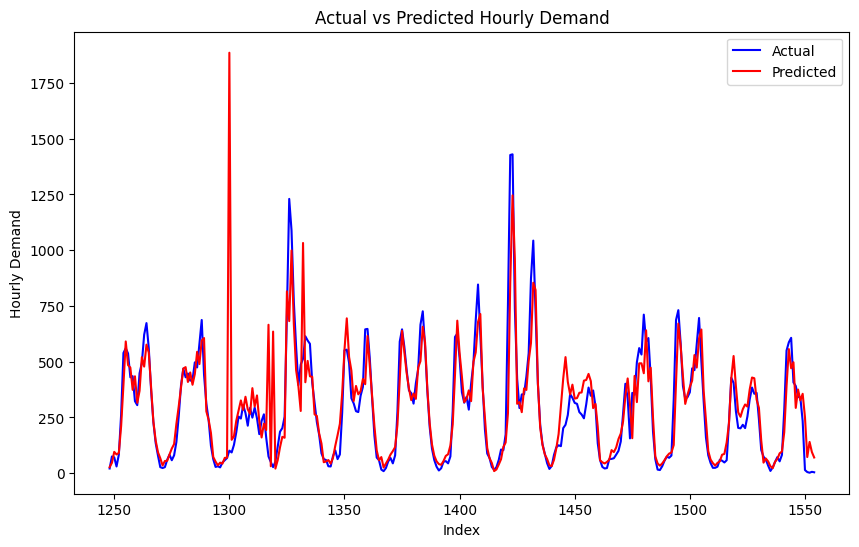

In [26]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.xlabel('Index')
plt.ylabel('Hourly Demand')
plt.title('Actual vs Predicted Hourly Demand')
plt.legend()
plt.show()


In [24]:
from itertools import product
from tqdm import tqdm

p_values = range(0, 6)  
d_values = range(0, 2) 
q_values = range(0, 6)

best_score = float('inf')
best_params = None

for p, d, q in tqdm(product(p_values, d_values, q_values)):
    try:
        order = (p, d, q)
        model = ARIMA(y_train, X_train, order=order)
        arima_model = model.fit()

        predictions = arima_model.predict(start=len(train_data), end=len(data)-1, exog=X_test)

        mae = mean_absolute_error(y_test, predictions)

        if mae < best_score:
            best_score = mae
            best_params = order
    except:
        continue

print("Best MAE:", best_score)
print("Best Parameters:", best_params)


0it [00:00, ?it/s]/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aayushjain/Library/Python/3.9/lib/python/site-p

Best MAE: 72.61934662595502
Best Parameters: (0, 1, 1)


In [79]:
new_sample = np.array([[0,0,35,487,122,92,205,656,1420]]) 
new_sample_df = pd.DataFrame(new_sample, columns=X_train.columns)

# Predict using the ARIMA model
forecast = arima_model.forecast(steps=1, exog=new_sample_df)

print("Forecasted Demand:", forecast)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [85]:
new_sample = np.array([[0,0,35,487,122,92,205,656,1420]]) 


In [88]:
new_sample_df = pd.DataFrame(new_sample, columns=X_train.columns)


In [89]:

forecast = arima_model.forecast(steps=1, exog=new_sample_df)

print("Forecasted Demand:", forecast)


Forecasted Demand: 1224    696.981015
dtype: float64


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: title={'center': 'Requests'}>

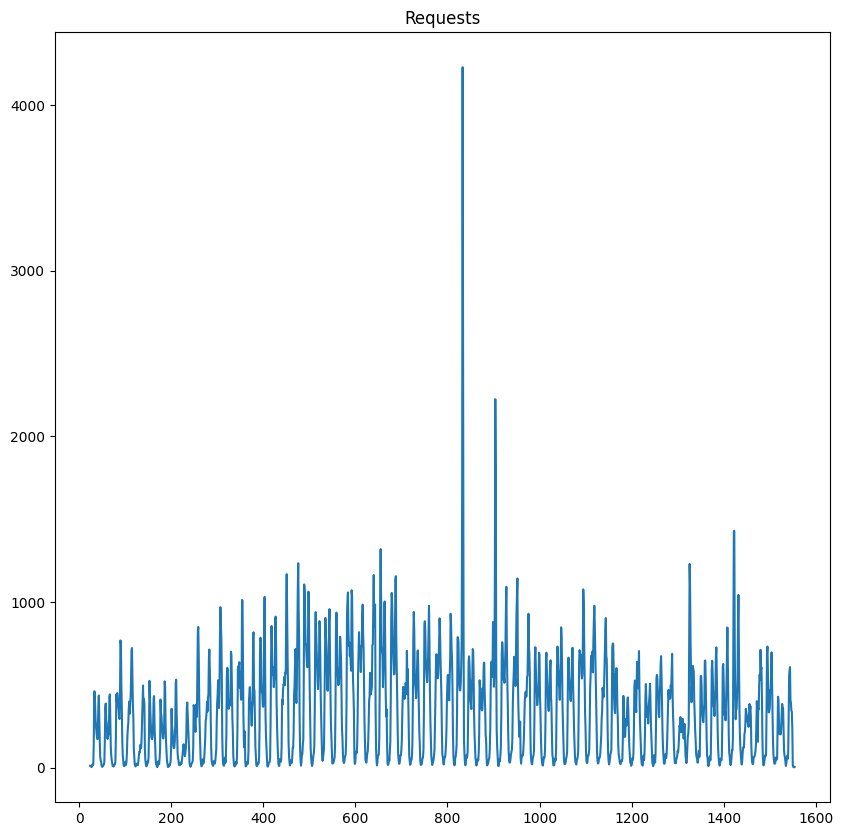

In [92]:
hourly_demand['y'].plot(title='Requests',figsize=(10,10))